### Problem Statement-
#### Use World Bank Projects dataset

● Option 2. Binary Classifier
○ Using the status variable build a binary classifier to predict the probability whether a project will be “closed” or “canceled/distressed”

In [1]:
#Importing Necessary Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
pd.set_option('display.max_Columns', None)

In [3]:
#Uploading Database
data = pd.read_excel('World_Bank_Projects.xls')
data.head()

,id,regionname,countryname,projectstatusdisplay,project_name,pdo,impagency,cons_serv_reqd_ind,url,boardapprovaldate,closingdate,projectfinancialtype,curr_project_cost,curr_ibrd_commitment,curr_ida_commitment,curr_total_commitment,grantamt,borrower,lendinginstr,envassesmentcategorycode,esrc_ovrl_risk_rate,sector1,sector2,sector3,theme1,theme2
0,P252350,Africa East,Republic of Rwanda,Active,Rwanda Priority Skills for Growth (PSG),The Program Development Objective is to expand...,Ministry Of Education,NaN,http://projects.worldbank.org/P252350/null?lan...,2017-07-05T00:00:00Z,9/30/2023 12:00:00 AM,IDA,120000000.0,0.0,120000000.0,120000000.0,0.0,Ministry of Finance and Economic Planning,Program-for-Results Financing,NaN,NaN,Public Administration - Education,Tertiary Education,Workforce Development and Vocational Education,Education for the knowledge economy,NaN
1,P252338,East Asia and Pacific,Democratic Republic of Timor-Leste,Active,Road Climate Resilience Project Second Additio...,The project will deliver sustainable climate r...,"Ministry of Public Works, Transport, and Commu...",NaN,http://projects.worldbank.org/P252338/null?lan...,2017-04-27T00:00:00Z,NaN,NaN,39140000.0,0.0,35200000.0,35200000.0,0.0,Ministry of Finance,Investment Project Financing,B,NaN,Rural and Inter-Urban Roads,Public Administration - Transportation,NaN,NaN,NaN
2,P252337,Africa East,Republic of Kenya,Dropped,Kenya Devolution and Service Delivery,To improve citizen and government access to co...,Kenya National Bureau of Statistics,NaN,http://projects.worldbank.org/P252337/null?lan...,NaN,NaN,NaN,340000.0,0.0,0.0,0.0,340000.0,Kenya National Bureau of Statistics,Investment Project Financing,C,NaN,NaN,NaN,NaN,"Public expenditure, financial management and p...",Decentralization
3,P178946,Europe and Central Asia,Ukraine,Pipeline,Ukraine Emergency Public Service Support,The development objective is to sustain instit...,Ministry of Finance,TBD,http://projects.worldbank.org/P178946/null?lan...,NaN,NaN,NaN,950000000.0,950000000.0,0.0,950000000.0,0.0,Ukraine,Investment Project Financing,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,P178935,Middle East and North Africa,Republic of Iraq,Pipeline,Iraq Integrated Persistent Organic Pollutants ...,Improve the management and safe disposal of ta...,Ministry of Environment,TBD,http://projects.worldbank.org/P178935/null?lan...,NaN,NaN,NaN,108000000.0,0.0,0.0,0.0,13490000.0,Ministry of Finance,Investment Project Financing,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
#Removing Unnecessary Columns
data=data.drop(['id','pdo','url','cons_serv_reqd_ind'],axis=1)

In [5]:
data.shape

(21445, 22)

In the above Dataset there is total 21445 rows and 22 columns.

In [6]:
data['projectstatusdisplay'].value_counts()

Closed      15756
Active       2972
Dropped      1707
Pipeline     1006
Name: projectstatusdisplay, dtype: int64

In [7]:
def change_value(X,Y):
    number = []
    for key,values in data["projectstatusdisplay"].iteritems():
        if(values) == X:
            number.append(key)
            
    for i in number:
        if data["projectstatusdisplay"][i] == X:
            data["projectstatusdisplay"][i] = Y

In [8]:
values = ['Dropped','Pipeline']
for i in values:
    change_value(i,'Closed')

In [9]:
data['projectstatusdisplay'].value_counts()

Closed    18469
Active     2972
Name: projectstatusdisplay, dtype: int64

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21445 entries, 0 to 21444
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   regionname                21442 non-null  object 
 1   countryname               21442 non-null  object 
 2   projectstatusdisplay      21441 non-null  object 
 3   project_name              21444 non-null  object 
 4   impagency                 6540 non-null   object 
 5   boardapprovaldate         18642 non-null  object 
 6   closingdate               16495 non-null  object 
 7   projectfinancialtype      12901 non-null  object 
 8   curr_project_cost         21297 non-null  float64
 9   curr_ibrd_commitment      21444 non-null  float64
 10  curr_ida_commitment       21444 non-null  float64
 11  curr_total_commitment     21444 non-null  float64
 12  grantamt                  21444 non-null  float64
 13  borrower                  6309 non-null   object 
 14  lendin

In the above Dataset there is total 22 columns in which 5 column's data type is float64 and remaning columns's data type is object which will be treated below

In [11]:
data.isnull().sum()

regionname                      3
countryname                     3
projectstatusdisplay            4
project_name                    1
impagency                   14905
boardapprovaldate            2803
closingdate                  4950
projectfinancialtype         8544
curr_project_cost             148
curr_ibrd_commitment            1
curr_ida_commitment             1
curr_total_commitment           1
grantamt                        1
borrower                    15136
lendinginstr                  249
envassesmentcategorycode     8363
esrc_ovrl_risk_rate         20244
sector1                      1915
sector2                     10355
sector3                     13930
theme1                       9190
theme2                      11550
dtype: int64

we can see that most of the columns have null values so we will treat them

In [12]:
data.columns

Index(['regionname', 'countryname', 'projectstatusdisplay', 'project_name',
       'impagency', 'boardapprovaldate', 'closingdate', 'projectfinancialtype',
       'curr_project_cost', 'curr_ibrd_commitment', 'curr_ida_commitment',
       'curr_total_commitment', 'grantamt', 'borrower', 'lendinginstr',
       'envassesmentcategorycode', 'esrc_ovrl_risk_rate', 'sector1', 'sector2',
       'sector3', 'theme1', 'theme2'],
      dtype='object')

In [13]:
#Filtering Categorical columns
categorical_col = data.select_dtypes("object")

In [14]:
categorical_col.head()

,regionname,countryname,projectstatusdisplay,project_name,impagency,boardapprovaldate,closingdate,projectfinancialtype,borrower,lendinginstr,envassesmentcategorycode,esrc_ovrl_risk_rate,sector1,sector2,sector3,theme1,theme2
0,Africa East,Republic of Rwanda,Active,Rwanda Priority Skills for Growth (PSG),Ministry Of Education,2017-07-05T00:00:00Z,9/30/2023 12:00:00 AM,IDA,Ministry of Finance and Economic Planning,Program-for-Results Financing,NaN,NaN,Public Administration - Education,Tertiary Education,Workforce Development and Vocational Education,Education for the knowledge economy,NaN
1,East Asia and Pacific,Democratic Republic of Timor-Leste,Active,Road Climate Resilience Project Second Additio...,"Ministry of Public Works, Transport, and Commu...",2017-04-27T00:00:00Z,NaN,NaN,Ministry of Finance,Investment Project Financing,B,NaN,Rural and Inter-Urban Roads,Public Administration - Transportation,NaN,NaN,NaN
2,Africa East,Republic of Kenya,Closed,Kenya Devolution and Service Delivery,Kenya National Bureau of Statistics,NaN,NaN,NaN,Kenya National Bureau of Statistics,Investment Project Financing,C,NaN,NaN,NaN,NaN,"Public expenditure, financial management and p...",Decentralization
3,Europe and Central Asia,Ukraine,Closed,Ukraine Emergency Public Service Support,Ministry of Finance,NaN,NaN,NaN,Ukraine,Investment Project Financing,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Middle East and North Africa,Republic of Iraq,Closed,Iraq Integrated Persistent Organic Pollutants ...,Ministry of Environment,NaN,NaN,NaN,Ministry of Finance,Investment Project Financing,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
# Fill Null values by mode
for i in categorical_col.columns:
    data[i] = data[i].fillna(data[i].mode()[0])

In [16]:
data.isnull().sum()

regionname                    0
countryname                   0
projectstatusdisplay          0
project_name                  0
impagency                     0
boardapprovaldate             0
closingdate                   0
projectfinancialtype          0
curr_project_cost           148
curr_ibrd_commitment          1
curr_ida_commitment           1
curr_total_commitment         1
grantamt                      1
borrower                      0
lendinginstr                  0
envassesmentcategorycode      0
esrc_ovrl_risk_rate           0
sector1                       0
sector2                       0
sector3                       0
theme1                        0
theme2                        0
dtype: int64

In [17]:
#Filtering numerical columns
numerical_data = data.select_dtypes(include=[np.number])

In [18]:
numerical_data.head()

,curr_project_cost,curr_ibrd_commitment,curr_ida_commitment,curr_total_commitment,grantamt
0,120000000.0,0.0,120000000.0,120000000.0,0.0
1,39140000.0,0.0,35200000.0,35200000.0,0.0
2,340000.0,0.0,0.0,0.0,340000.0
3,950000000.0,950000000.0,0.0,950000000.0,0.0
4,108000000.0,0.0,0.0,0.0,13490000.0


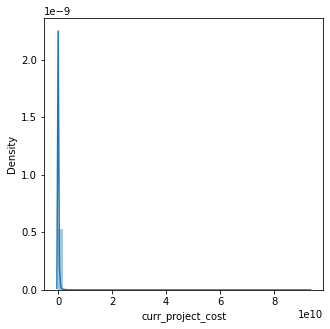

43.86989847250688


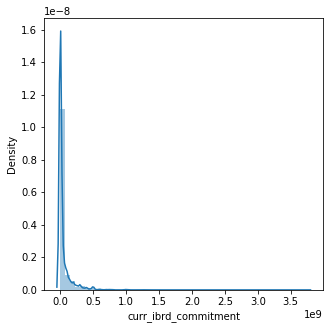

7.225760374741808


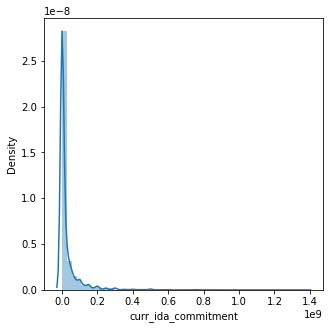

5.632947125229919


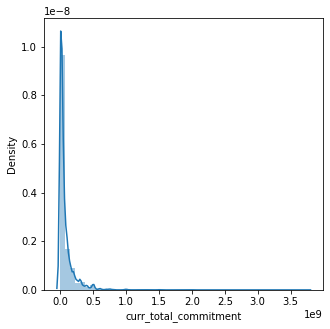

5.867526698410762


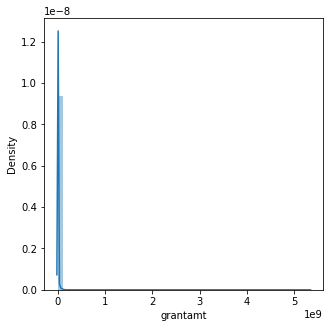

119.05949061821893


In [19]:
#Ploting Dist plot for numerical columns
for i in numerical_data.columns:
    plt.figure(figsize=(5,5))
    sns.distplot(data[i])
    plt.show()
    print(data[i].skew())

In [20]:
#filling null values in numerical columns by median
for i in numerical_data.columns:
    data[i] = data[i].fillna(data[i].median())

In [21]:
data.isnull().sum()

regionname                  0
countryname                 0
projectstatusdisplay        0
project_name                0
impagency                   0
boardapprovaldate           0
closingdate                 0
projectfinancialtype        0
curr_project_cost           0
curr_ibrd_commitment        0
curr_ida_commitment         0
curr_total_commitment       0
grantamt                    0
borrower                    0
lendinginstr                0
envassesmentcategorycode    0
esrc_ovrl_risk_rate         0
sector1                     0
sector2                     0
sector3                     0
theme1                      0
theme2                      0
dtype: int64

Now there is no null values in our Dataset which is good.

In [22]:
data.columns

Index(['regionname', 'countryname', 'projectstatusdisplay', 'project_name',
       'impagency', 'boardapprovaldate', 'closingdate', 'projectfinancialtype',
       'curr_project_cost', 'curr_ibrd_commitment', 'curr_ida_commitment',
       'curr_total_commitment', 'grantamt', 'borrower', 'lendinginstr',
       'envassesmentcategorycode', 'esrc_ovrl_risk_rate', 'sector1', 'sector2',
       'sector3', 'theme1', 'theme2'],
      dtype='object')

In [23]:
data['sector3'].value_counts()

Central Government (Central Agencies)            14691
Sub-National Government                            523
Social Protection                                  469
Health                                             312
Other Industry, Trade and Services                 272
                                                 ...  
Petrochemicals and fertilizers                       1
(Historic)Industrial restructuring                   1
Payments, settlements, and remittance systems        1
(Historic)Industrial adjustment                      1
(Historic)Non-sector specific                        1
Name: sector3, Length: 91, dtype: int64

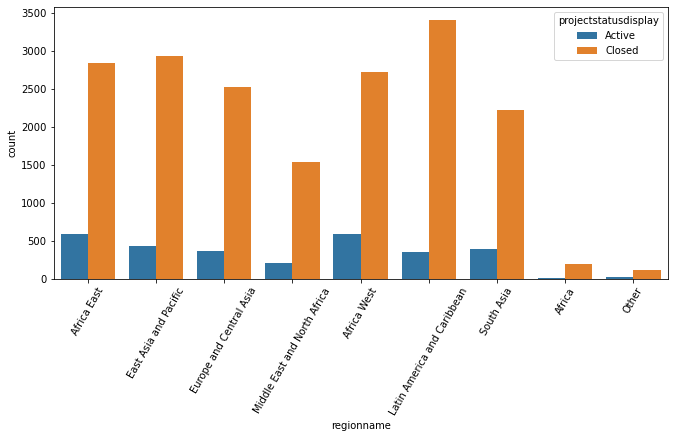

In [24]:
plt.figure(figsize=(11,5))
plt.xticks(rotation=60)
sns.countplot(data['regionname'],hue=data['projectstatusdisplay'])
plt.show()

In [25]:
data['regionname'].value_counts()

Latin America and Caribbean     3752
Africa East                     3428
East Asia and Pacific           3365
Africa West                     3305
Europe and Central Asia         2884
South Asia                      2612
Middle East and North Africa    1745
Africa                           210
Other                            144
Name: regionname, dtype: int64

In [26]:
data['countryname'].value_counts()

Republic of India                917
Republic of Indonesia            647
People's Republic of China       610
Federative Republic of Brazil    575
Islamic Republic of Pakistan     495
                                ... 
Mercosur                           1
Republic of Malta                  1
French Republic                    1
Antigua and Barbuda                1
Grand Duchy of Luxembourg          1
Name: countryname, Length: 206, dtype: int64

In [27]:
data[data['projectstatusdisplay']=='Closed'][data['countryname']=='Republic of India']

,regionname,countryname,projectstatusdisplay,project_name,impagency,boardapprovaldate,closingdate,projectfinancialtype,curr_project_cost,curr_ibrd_commitment,curr_ida_commitment,curr_total_commitment,grantamt,borrower,lendinginstr,envassesmentcategorycode,esrc_ovrl_risk_rate,sector1,sector2,sector3,theme1,theme2
14,South Asia,Republic of India,Closed,Unlocking e-bus market: Payment Security Mecha...,Ministry of Finance,2020-04-02T00:00:00Z,6/30/2022 12:00:00 AM,Other,1.145000e+09,1.950000e+08,0.0,1.950000e+08,0.0,Ministry of Finance,Investment Project Financing,B,Substantial,Central Government (Central Agencies),Central Government (Central Agencies),Central Government (Central Agencies),Rural services and infrastructure,Rural services and infrastructure
45,South Asia,Republic of India,Closed,Unlocking Assam's Growth Potential,State of Assam,2020-04-02T00:00:00Z,6/30/2022 12:00:00 AM,Other,1.250000e+08,1.250000e+08,0.0,1.250000e+08,0.0,The Republic of India,Development Policy Lending,B,Substantial,Central Government (Central Agencies),Central Government (Central Agencies),Central Government (Central Agencies),Rural services and infrastructure,Rural services and infrastructure
101,South Asia,Republic of India,Closed,Assam State Bridge Infrastructure Program,Ministry of Finance,2020-04-02T00:00:00Z,6/30/2022 12:00:00 AM,Other,1.174000e+09,4.700000e+08,0.0,4.700000e+08,0.0,Ministry of Finance,Program-for-Results Financing,B,Substantial,Central Government (Central Agencies),Central Government (Central Agencies),Central Government (Central Agencies),Rural services and infrastructure,Rural services and infrastructure
103,South Asia,Republic of India,Closed,Strengthening Teaching-Learning and Results fo...,Ministry of Finance,2020-04-02T00:00:00Z,6/30/2022 12:00:00 AM,Other,1.000000e+09,1.000000e+09,0.0,1.000000e+09,0.0,Ministry of Finance,Program-for-Results Financing,B,Substantial,Central Government (Central Agencies),Central Government (Central Agencies),Central Government (Central Agencies),Rural services and infrastructure,Rural services and infrastructure
133,South Asia,Republic of India,Closed,Strengthening India's Systems for Improved Nut...,Ministry of Women and Child Development,2020-04-02T00:00:00Z,6/30/2022 12:00:00 AM,Other,1.400000e+10,5.000000e+08,0.0,5.000000e+08,0.0,Department of Economic Affairs,Program-for-Results Financing,B,Substantial,Central Government (Central Agencies),Central Government (Central Agencies),Central Government (Central Agencies),Rural services and infrastructure,Rural services and infrastructure
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14952,South Asia,Republic of India,Closed,Bokaro - Konar Electric Power Project,Ministry of Finance,1950-04-18T00:00:00Z,2/29/1956 12:00:00 AM,Other,1.850000e+07,1.850000e+07,0.0,1.850000e+07,0.0,Ministry of Finance,Specific Investment Loan,B,Substantial,(Historic)Thermal,Central Government (Central Agencies),Central Government (Central Agencies),Rural services and infrastructure,Rural services and infrastructure
14953,South Asia,Republic of India,Closed,Agricultural Machinery Project,Ministry of Finance,1949-09-29T00:00:00Z,12/31/1953 12:00:00 AM,Other,1.000000e+07,1.000000e+07,0.0,1.000000e+07,0.0,Ministry of Finance,Sector Investment and Maintenance Loan,B,Substantial,(Historic)Agriculture adjustment,Central Government (Central Agencies),Central Government (Central Agencies),Rural services and infrastructure,Rural services and infrastructure
14954,South Asia,Republic of India,Closed,ODS I,Ministry of Finance,1994-08-29T00:00:00Z,6/30/2022 12:00:00 AM,Grants,3.250000e+07,0.000000e+00,0.0,0.000000e+00,1300000.0,Ministry of Finance,Specific Investment Loan,B,Substantial,Central Government (Central Agencies),Central Government (Central Agencies),Central Government (Central Agencies),Climate change,Water resource management
14955,South Asia,Republic of India,Closed,Ecodevelopment,Ministry of Finance,1996-09-05T00:00

In [28]:
data[data['projectstatusdisplay']=='Active'][data['countryname']=='Republic of India']

,regionname,countryname,projectstatusdisplay,project_name,impagency,boardapprovaldate,closingdate,projectfinancialtype,curr_project_cost,curr_ibrd_commitment,curr_ida_commitment,curr_total_commitment,grantamt,borrower,lendinginstr,envassesmentcategorycode,esrc_ovrl_risk_rate,sector1,sector2,sector3,theme1,theme2
662,South Asia,Republic of India,Active,Creating a Coordinated and Responsive Indian S...,"Department of Economic Affairs (DEA), Ministry...",2021-06-29T00:00:00Z,12/31/2022 12:00:00 AM,IDA,5.000000e+08,387500000.0,1.125000e+08,5.000000e+08,0.0,India,Development Policy Lending,B,Substantial,Other Public Administration,ICT Services,Central Government (Central Agencies),Rural services and infrastructure,Rural services and infrastructure
752,South Asia,Republic of India,Active,Additional Financing - Karnataka Urban Water S...,Karnataka Urban Infrastructure Development & F...,2021-12-21T00:00:00Z,6/30/2022 12:00:00 AM,Other,2.218500e+08,150000000.0,0.000000e+00,1.500000e+08,0.0,India,Investment Project Financing,B,Substantial,Water Supply,Sanitation,"Public Administration - Water, Sanitation and ...",Rural services and infrastructure,Rural services and infrastructure
819,South Asia,Republic of India,Active,FACILITATING SCHOOL TO WORK TRANSITION,Central Board of Secondary Education,2021-06-02T00:00:00Z,12/15/2023 12:00:00 AM,Grants,2.000000e+06,0.0,0.000000e+00,0.000000e+00,2000000.0,Central Board of Secondary Education (CBSE),Investment Project Financing,B,Moderate,Other Education,Workforce Development and Vocational Education,Public Administration - Education,Rural services and infrastructure,Rural services and infrastructure
934,South Asia,Republic of India,Active,Chennai City Partnership: Sustainable Urban Se...,State of Tamil Nadu,2021-09-30T00:00:00Z,12/31/2026 12:00:00 AM,Other,2.159000e+09,150000000.0,0.000000e+00,1.500000e+08,0.0,India,Program-for-Results Financing,B,Substantial,Sanitation,Urban Transport,Water Supply,Rural services and infrastructure,Rural services and infrastructure
1016,South Asia,Republic of India,Active,The Resilient Kerala Program,Government of Kerala,2021-06-24T00:00:00Z,6/30/2026 12:00:00 AM,Other,2.231650e+09,125000000.0,0.000000e+00,1.250000e+08,0.0,India,Program-for-Results Financing,B,Substantial,"Other Water Supply, Sanitation and Waste Manag...",Social Protection,Sub-National Government,Rural services and infrastructure,Rural services and infrastructure
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6022,South Asia,Republic of India,Active,Bihar Kosi Basin Development Project,Bihar Aapada Punarwas Evam Punarnirman Society...,2015-12-08T00:00:00Z,3/31/2023 12:00:00 AM,Other,3.765000e+08,0.0,2.500000e+08,2.500000e+08,0.0,Republic of India,Investment Project Financing,A,Substantial,Rural and Inter-Urban Roads,"Other Agriculture, Fishing and Forestry","Other Water Supply, Sanitation and Waste Manag...",Natural disaster management,Rural policies and institutions
6813,South Asia,Republic of India,Active,India: ICDS Systems Strengthening & Nutrition ...,Ministry of Women and Child Development,2012-09-06T00:00:00Z,8/30/2022 12:00:00 AM,Other,1.515000e+08,0.0,1.060000e+08,1.060000e+08,0.0,Republic of India,Investment Project Financing,C,Substantial,Central Government (Central Agencies),Sub-National Government,Early Childhood Education,Gender,Nutrition and food security
7092,South Asia,Republic of India,Active,Scaling up of Assam PWD Computerization Project,Ministry of Finance,2011-12-19T00:00:00Z,6/30/2022 12:00:00 AM,Other,1.750000e+06,0.0,0.000000e+00,0.000000e+00,1750000.0,Ministry of Finance,Investment Project Financing,C,Substantial,Other Transportation,Central Government (Central Agencies),Central Government (Central Agencies),Other public sector governance,Rural services and infrastructure
8884,South Asia,Republic of India,Active,National Rural Livelihoods Project,Ministry of Rural Development,2011-07-05T00:00:00Z,6/30/2023 12:00:00 AM,Other,

In [29]:
#Importing date and time
import time
import datetime

In [30]:
data['boardapprovaldate'] = pd.to_datetime(data['boardapprovaldate'])

In [31]:
data['Date_of_approval'] = data['boardapprovaldate'].dt.date

In [32]:
data.head()

,regionname,countryname,projectstatusdisplay,project_name,impagency,boardapprovaldate,closingdate,projectfinancialtype,curr_project_cost,curr_ibrd_commitment,curr_ida_commitment,curr_total_commitment,grantamt,borrower,lendinginstr,envassesmentcategorycode,esrc_ovrl_risk_rate,sector1,sector2,sector3,theme1,theme2,Date_of_approval
0,Africa East,Republic of Rwanda,Active,Rwanda Priority Skills for Growth (PSG),Ministry Of Education,2017-07-05 00:00:00+00:00,9/30/2023 12:00:00 AM,IDA,120000000.0,0.0,120000000.0,120000000.0,0.0,Ministry of Finance and Economic Planning,Program-for-Results Financing,B,Substantial,Public Administration - Education,Tertiary Education,Workforce Development and Vocational Education,Education for the knowledge economy,Rural services and infrastructure,2017-07-05
1,East Asia and Pacific,Democratic Republic of Timor-Leste,Active,Road Climate Resilience Project Second Additio...,"Ministry of Public Works, Transport, and Commu...",2017-04-27 00:00:00+00:00,6/30/2022 12:00:00 AM,Other,39140000.0,0.0,35200000.0,35200000.0,0.0,Ministry of Finance,Investment Project Financing,B,Substantial,Rural and Inter-Urban Roads,Public Administration - Transportation,Central Government (Central Agencies),Rural services and infrastructure,Rural services and infrastructure,2017-04-27
2,Africa East,Republic of Kenya,Closed,Kenya Devolution and Service Delivery,Kenya National Bureau of Statistics,2020-04-02 00:00:00+00:00,6/30/2022 12:00:00 AM,Other,340000.0,0.0,0.0,0.0,340000.0,Kenya National Bureau of Statistics,Investment Project Financing,C,Substantial,Central Government (Central Agencies),Central Government (Central Agencies),Central Government (Central Agencies),"Public expenditure, financial management and p...",Decentralization,2020-04-02
3,Europe and Central Asia,Ukraine,Closed,Ukraine Emergency Public Service Support,Ministry of Finance,2020-04-02 00:00:00+00:00,6/30/2022 12:00:00 AM,Other,950000000.0,950000000.0,0.0,950000000.0,0.0,Ukraine,Investment Project Financing,B,Substantial,Central Government (Central Agencies),Central Government (Central Agencies),Central Government (Central Agencies),Rural services and infrastructure,Rural services and infrastructure,2020-04-02
4,Middle East and North Africa,Republic of Iraq,Closed,Iraq Integrated Persistent Organic Pollutants ...,Ministry of Environment,2020-04-02 00:00:00+00:00,6/30/2022 12:00:00 AM,Other,108000000.0,0.0,0.0,0.0,13490000.0,Ministry of Finance,Investment Project Financing,B,Substantial,Central Government (Central Agencies),Central Government (Central Agencies),Central Government (Central Agencies),Rural services and infrastructure,Rural services and infrastructure,2020-04-02


In [33]:
data['closingdate'] = pd.to_datetime(data['closingdate'])

In [34]:
data['Date_of_closing'] = data['closingdate'].dt.date

In [35]:
data.head()

,regionname,countryname,projectstatusdisplay,project_name,impagency,boardapprovaldate,closingdate,projectfinancialtype,curr_project_cost,curr_ibrd_commitment,curr_ida_commitment,curr_total_commitment,grantamt,borrower,lendinginstr,envassesmentcategorycode,esrc_ovrl_risk_rate,sector1,sector2,sector3,theme1,theme2,Date_of_approval,Date_of_closing
0,Africa East,Republic of Rwanda,Active,Rwanda Priority Skills for Growth (PSG),Ministry Of Education,2017-07-05 00:00:00+00:00,2023-09-30,IDA,120000000.0,0.0,120000000.0,120000000.0,0.0,Ministry of Finance and Economic Planning,Program-for-Results Financing,B,Substantial,Public Administration - Education,Tertiary Education,Workforce Development and Vocational Education,Education for the knowledge economy,Rural services and infrastructure,2017-07-05,2023-09-30
1,East Asia and Pacific,Democratic Republic of Timor-Leste,Active,Road Climate Resilience Project Second Additio...,"Ministry of Public Works, Transport, and Commu...",2017-04-27 00:00:00+00:00,2022-06-30,Other,39140000.0,0.0,35200000.0,35200000.0,0.0,Ministry of Finance,Investment Project Financing,B,Substantial,Rural and Inter-Urban Roads,Public Administration - Transportation,Central Government (Central Agencies),Rural services and infrastructure,Rural services and infrastructure,2017-04-27,2022-06-30
2,Africa East,Republic of Kenya,Closed,Kenya Devolution and Service Delivery,Kenya National Bureau of Statistics,2020-04-02 00:00:00+00:00,2022-06-30,Other,340000.0,0.0,0.0,0.0,340000.0,Kenya National Bureau of Statistics,Investment Project Financing,C,Substantial,Central Government (Central Agencies),Central Government (Central Agencies),Central Government (Central Agencies),"Public expenditure, financial management and p...",Decentralization,2020-04-02,2022-06-30
3,Europe and Central Asia,Ukraine,Closed,Ukraine Emergency Public Service Support,Ministry of Finance,2020-04-02 00:00:00+00:00,2022-06-30,Other,950000000.0,950000000.0,0.0,950000000.0,0.0,Ukraine,Investment Project Financing,B,Substantial,Central Government (Central Agencies),Central Government (Central Agencies),Central Government (Central Agencies),Rural services and infrastructure,Rural services and infrastructure,2020-04-02,2022-06-30
4,Middle East and North Africa,Republic of Iraq,Closed,Iraq Integrated Persistent Organic Pollutants ...,Ministry of Environment,2020-04-02 00:00:00+00:00,2022-06-30,Other,108000000.0,0.0,0.0,0.0,13490000.0,Ministry of Finance,Investment Project Financing,B,Substantial,Central Government (Central Agencies),Central Government (Central Agencies),Central Government (Central Agencies),Rural services and infrastructure,Rural services and infrastructure,2020-04-02,2022-06-30


In [36]:
#Now Dropping Extra Columns
data.drop(['boardapprovaldate','closingdate'], axis=1, inplace=True)

In [37]:
data['regionname'].value_counts()

Latin America and Caribbean     3752
Africa East                     3428
East Asia and Pacific           3365
Africa West                     3305
Europe and Central Asia         2884
South Asia                      2612
Middle East and North Africa    1745
Africa                           210
Other                            144
Name: regionname, dtype: int64

In [38]:
data[data['projectstatusdisplay']=='Closed'][data['regionname']=='Latin America and Caribbean']

,regionname,countryname,projectstatusdisplay,project_name,impagency,projectfinancialtype,curr_project_cost,curr_ibrd_commitment,curr_ida_commitment,curr_total_commitment,grantamt,borrower,lendinginstr,envassesmentcategorycode,esrc_ovrl_risk_rate,sector1,sector2,sector3,theme1,theme2,Date_of_approval,Date_of_closing
11,Latin America and Caribbean,Federative Republic of Brazil,Closed,Brazil Climate Finance Project,Ministry of Finance,Other,500000000.0,500000000.0,0.0,500000000.0,0.0,Ministry of Finance,Investment Project Financing,B,Substantial,Central Government (Central Agencies),Central Government (Central Agencies),Central Government (Central Agencies),Rural services and infrastructure,Rural services and infrastructure,2020-04-02,2022-06-30
17,Latin America and Caribbean,Plurinational State of Bolivia,Closed,Resilient Community and Household Irrigation P...,Viceministerio de Recursos Hidricos y Riego (V...,Other,250000000.0,225000000.0,0.0,225000000.0,0.0,Ministry of Finance,Investment Project Financing,B,Substantial,Central Government (Central Agencies),Central Government (Central Agencies),Central Government (Central Agencies),Rural services and infrastructure,Rural services and infrastructure,2020-04-02,2022-06-30
21,Latin America and Caribbean,Republic of Peru,Closed,Lima Traffic Management to support Non-Motoriz...,Ministry of Finance,Other,120000000.0,100000000.0,0.0,100000000.0,0.0,Ministry of Finance,Investment Project Financing,B,Substantial,Central Government (Central Agencies),Central Government (Central Agencies),Central Government (Central Agencies),Rural services and infrastructure,Rural services and infrastructure,2020-04-02,2022-06-30
47,Latin America and Caribbean,Republic of Haiti,Closed,AF Strengthening DRM and Climate Resilience Pr...,Ministry of Interior and Local authorities,Other,11000000.0,0.0,11000000.0,11000000.0,0.0,Ministry of Economy and Finance,Investment Project Financing,B,Substantial,Central Government (Central Agencies),Central Government (Central Agencies),Central Government (Central Agencies),Rural services and infrastructure,Rural services and infrastructure,2020-04-02,2022-06-30
48,Latin America and Caribbean,Republic of El Salvador,Closed,El Salvador Water Sector Resilience Project,Ministry of Finance,Other,100000000.0,100000000.0,0.0,100000000.0,0.0,Ministry of Finance,Investment Project Financing,B,Substantial,Central Government (Central Agencies),Central Government (Central Agencies),Central Government (Central Agencies),Rural services and infrastructure,Rural services and infrastructure,2020-04-02,2022-06-30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17309,Latin America and Caribbean,Argentine Republic,Closed,Buenos Aires Power Project (02),Ministry of Finance,Other,55000000.0,55000000.0,0.0,55000000.0,0.0,Ministry of Finance,Specific Investment Loan,B,Substantial,(Historic)Thermal,Central Government (Central Agencies),Central Government (Central Agencies),Rural services and infrastructure,Rural services and infrastructure,1968-01-25,1970-04-15
17310,Latin America and Caribbean,Argentine Republic,Closed,Balcarce Livestock Project,Ministry of Finance,Other,15300000.0,15300000.0,0.0,15300000.0,0.0,Ministry of Finance,Specific Investment Loan,B,Substantial,Livestock,Central Government (Central Agencies),Central Government (Central Agencies),Rural services and infrastructure,Rural services and infrastructure,1967-07-31,1980-07-31
17311,Latin America and Caribbean,Argentine Republic,Closed,Buenos Aires Power Project,Ministry of Finance,Other,95000000.0,95000000.0,0.0,95000000.0,0.0,Ministry of Finance,Specific Investment Loan,B,Substantial,(Historic)Thermal,Central Government (Central Agencies),Central Government (Central Agencies),Rural services and infrastructure,Rural services and infrastructure,1962-01-23,1965-06-30
17312,Latin America and Caribbean,Argentine Republic,Closed,Road Project,Ministry of Finance,Other,48500000.0,48500000.0,

In [39]:
data['sector3'].value_counts()

Central Government (Central Agencies)            14691
Sub-National Government                            523
Social Protection                                  469
Health                                             312
Other Industry, Trade and Services                 272
                                                 ...  
Petrochemicals and fertilizers                       1
(Historic)Industrial restructuring                   1
Payments, settlements, and remittance systems        1
(Historic)Industrial adjustment                      1
(Historic)Non-sector specific                        1
Name: sector3, Length: 91, dtype: int64

In [40]:
data['Date_of_approval']

0        2017-07-05
1        2017-04-27
2        2020-04-02
3        2020-04-02
4        2020-04-02
            ...    
21440    2020-04-02
21441    1992-05-19
21442    1990-02-01
21443    1997-12-18
21444    1995-09-14
Name: Date_of_approval, Length: 21445, dtype: object

In [41]:
data['Date_of_closing']

0        2023-09-30
1        2022-06-30
2        2022-06-30
3        2022-06-30
4        2022-06-30
            ...    
21440    2022-06-30
21441    1999-12-31
21442    1997-12-31
21443    2003-06-30
21444    2004-06-30
Name: Date_of_closing, Length: 21445, dtype: object

In [42]:
#Converting Date_of_approval into Day Monyh And year Format
data['Day_of_approval'] = pd.to_datetime(data['Date_of_approval'], format="%Y-%m-%d").dt.day
data['Month_of_approval']= pd.to_datetime(data['Date_of_approval'], format="%Y-%m-%d").dt.month
data['year_of_approval'] = pd.to_datetime(data['Date_of_approval'], format="%Y-%m-%d").dt.year

In [43]:
#Converting Date_of_closing into Day Monyh And year Format
data['Day_of_closing'] = pd.to_datetime(data['Date_of_closing'], format="%Y-%m-%d").dt.day
data['Month_of_closing']= pd.to_datetime(data['Date_of_closing'], format="%Y-%m-%d").dt.month
data['year_of_closing'] = pd.to_datetime(data['Date_of_closing'], format="%Y-%m-%d").dt.year

In [44]:
#Now Dropping Extra Columns
data.drop(['Date_of_closing','Date_of_approval'],inplace=True,axis=1)

In [45]:
data.head(5)

,regionname,countryname,projectstatusdisplay,project_name,impagency,projectfinancialtype,curr_project_cost,curr_ibrd_commitment,curr_ida_commitment,curr_total_commitment,grantamt,borrower,lendinginstr,envassesmentcategorycode,esrc_ovrl_risk_rate,sector1,sector2,sector3,theme1,theme2,Day_of_approval,Month_of_approval,year_of_approval,Day_of_closing,Month_of_closing,year_of_closing
0,Africa East,Republic of Rwanda,Active,Rwanda Priority Skills for Growth (PSG),Ministry Of Education,IDA,120000000.0,0.0,120000000.0,120000000.0,0.0,Ministry of Finance and Economic Planning,Program-for-Results Financing,B,Substantial,Public Administration - Education,Tertiary Education,Workforce Development and Vocational Education,Education for the knowledge economy,Rural services and infrastructure,5,7,2017,30,9,2023
1,East Asia and Pacific,Democratic Republic of Timor-Leste,Active,Road Climate Resilience Project Second Additio...,"Ministry of Public Works, Transport, and Commu...",Other,39140000.0,0.0,35200000.0,35200000.0,0.0,Ministry of Finance,Investment Project Financing,B,Substantial,Rural and Inter-Urban Roads,Public Administration - Transportation,Central Government (Central Agencies),Rural services and infrastructure,Rural services and infrastructure,27,4,2017,30,6,2022
2,Africa East,Republic of Kenya,Closed,Kenya Devolution and Service Delivery,Kenya National Bureau of Statistics,Other,340000.0,0.0,0.0,0.0,340000.0,Kenya National Bureau of Statistics,Investment Project Financing,C,Substantial,Central Government (Central Agencies),Central Government (Central Agencies),Central Government (Central Agencies),"Public expenditure, financial management and p...",Decentralization,2,4,2020,30,6,2022
3,Europe and Central Asia,Ukraine,Closed,Ukraine Emergency Public Service Support,Ministry of Finance,Other,950000000.0,950000000.0,0.0,950000000.0,0.0,Ukraine,Investment Project Financing,B,Substantial,Central Government (Central Agencies),Central Government (Central Agencies),Central Government (Central Agencies),Rural services and infrastructure,Rural services and infrastructure,2,4,2020,30,6,2022
4,Middle East and North Africa,Republic of Iraq,Closed,Iraq Integrated Persistent Organic Pollutants ...,Ministry of Environment,Other,108000000.0,0.0,0.0,0.0,13490000.0,Ministry of Finance,Investment Project Financing,B,Substantial,Central Government (Central Agencies),Central Government (Central Agencies),Central Government (Central Agencies),Rural services and infrastructure,Rural services and infrastructure,2,4,2020,30,6,2022


In [46]:
#Encoded object data into int
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()
for i in data.columns:
    if data[i].dtype == 'object':
        data[i] = label.fit_transform(data[i])

In [47]:
data.shape

(21445, 26)

regionname                     AxesSubplot(0.125,0.749828;0.0945122x0.130172)
countryname                 AxesSubplot(0.238415,0.749828;0.0945122x0.130172)
projectstatusdisplay        AxesSubplot(0.351829,0.749828;0.0945122x0.130172)
project_name                AxesSubplot(0.465244,0.749828;0.0945122x0.130172)
impagency                   AxesSubplot(0.578659,0.749828;0.0945122x0.130172)
projectfinancialtype        AxesSubplot(0.692073,0.749828;0.0945122x0.130172)
curr_project_cost           AxesSubplot(0.805488,0.749828;0.0945122x0.130172)
curr_ibrd_commitment           AxesSubplot(0.125,0.593621;0.0945122x0.130172)
curr_ida_commitment         AxesSubplot(0.238415,0.593621;0.0945122x0.130172)
curr_total_commitment       AxesSubplot(0.351829,0.593621;0.0945122x0.130172)
grantamt                    AxesSubplot(0.465244,0.593621;0.0945122x0.130172)
borrower                    AxesSubplot(0.578659,0.593621;0.0945122x0.130172)
lendinginstr                AxesSubplot(0.692073,0.593621;0.0945

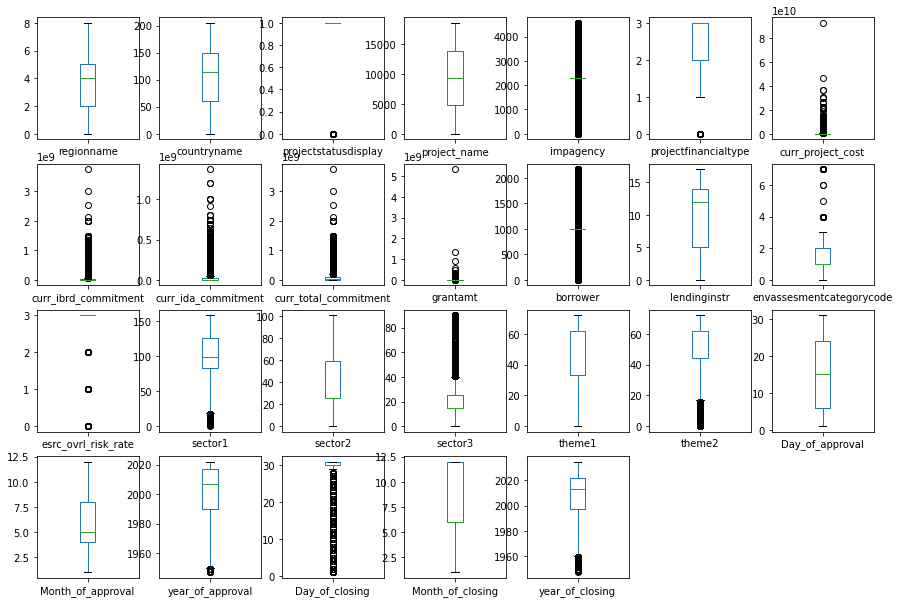

In [48]:
#Plotting box plot for finding outliers
data.plot(kind='box',subplots=True, layout=(5,7), figsize = (15,13))

In [49]:
# Finding Corelation 
data.corr()

,regionname,countryname,projectstatusdisplay,project_name,impagency,projectfinancialtype,curr_project_cost,curr_ibrd_commitment,curr_ida_commitment,curr_total_commitment,grantamt,borrower,lendinginstr,envassesmentcategorycode,esrc_ovrl_risk_rate,sector1,sector2,sector3,theme1,theme2,Day_of_approval,Month_of_approval,year_of_approval,Day_of_closing,Month_of_closing,year_of_closing
regionname,1.000000,-0.153775,0.035353,-0.019139,-0.003675,0.059536,0.049579,0.137673,-0.030994,0.110450,0.018989,-0.044419,0.029413,-0.026068,0.009410,0.005497,-0.011931,-0.027857,0.011077,0.010257,-0.023677,-0.010079,-0.051226,-0.010170,-0.013290,-0.057931
countryname,-0.153775,1.000000,-0.003469,0.127588,0.041616,0.014616,-0.015137,0.012987,-0.023536,-0.000275,-0.000171,0.193040,-0.021890,0.020776,-0.002490,-0.016711,-0.012042,-0.017370,0.006299,0.019621,-0.015337,0.011508,0.006990,0.003850,-0.008690,0.006628
projectstatusdisplay,0.035353,-0.003469,1.000000,0.030521,-0.022444,0.173668,-0.053473,-0.002409,-0.175391,-0.093217,-0.010352,-0.174813,0.368230,0.123154,0.179117,-0.192225,-0.222146,-0.119905,-0.129946,-0.118143,-0.119746,-0.023019,-0.385410,0.013504,0.022935,-0.387141
project_name,-0.019139,0.127588,0.030521,1.000000,0.036237,0.052868,0.004699,0.024143,0.014758,0.029838,-0.013225,0.035510,0.079525,0.016586,-0.005843,0.018667,0.012244,0.006986,0.032370,0.017433,0.001822,-0.003666,-0.049361,0.019521,0.025698,-0.049911
impagency,-0.003675,0.041616,-0.022444,0.036237,1.000000,-0.008291,-0.011636,-0.005049,0.003818,-0.002659,0.001997,0.195723,-0.004198,-0.009031,-0.017571,0.007495,0.017197,-0.012031,0.014209,0.005723,-0.009597,0.002459,0.008360,-0.004651,-0.007267,0.006144
projectfinancialtype,0.059536,0.014616,0.173668,0.052868,-0.008291,1.000000,0.017422,-0.024943,0.071835,0.014355,-0.036420,-0.009040,0.124289,-0.145959,0.012648,-0.273025,-0.170936,-0.112022,0.184142,0.099858,-0.131385,-0.103275,-0.293217,0.067772,-0.016350,-0.276596
curr_project_cost,0.049579,-0.015137,-0.053473,0.004699,-0.011636,0.017422,1.000000,0.226436,0.116678,0.268645,0.031344,-0.004523,-0.040609,-0.022173,-0.019828,0.036015,0.027907,0.014390,0.009954,0.005403,-0.010900,-0.010560,0.071093,0.005098,-0.005337,0.066346
curr_ibrd_commitment,0.137673,0.012987,-0.002409,0.024143,-0.005049,-0.024943,0.226436,1.000000,-0.119391,0.857091,-0.018077,0.014313,-0.104101,0.010930,-0.009993,0.025736,0.026790,0.027714,0.016013,-0.013688,-0.015638,-0.002078,0.065513,0.012393,0.030993,0.039669
curr_ida_commitment,-0.030994,-0.023536,-0.175391,0.014758,0.003818,0.071835,0.116678,-0.119391,1.000000,0.409149,-0.019218,0.046852,-0.164445,-0.060207,-0.126283,0.085055,0.091049,0.086973,0.053832,0.018921,0.003264,-0.020483,0.181774,-0.004802,-0.023128,0.175860
curr_total_commitment,0.110450,-0.000275,-0.093217,0.029838,-0.002659,0.014355,0.268645,0.857091,0.409149,1.000000,-0.026586,0.037464,-0.180993,-0.021199,-0.074708,0.067782,0.071859,0.070595,0.042655,-0.002757,-0.012690,-0.012544,0.154537,0.008899,0.016479,0.127715


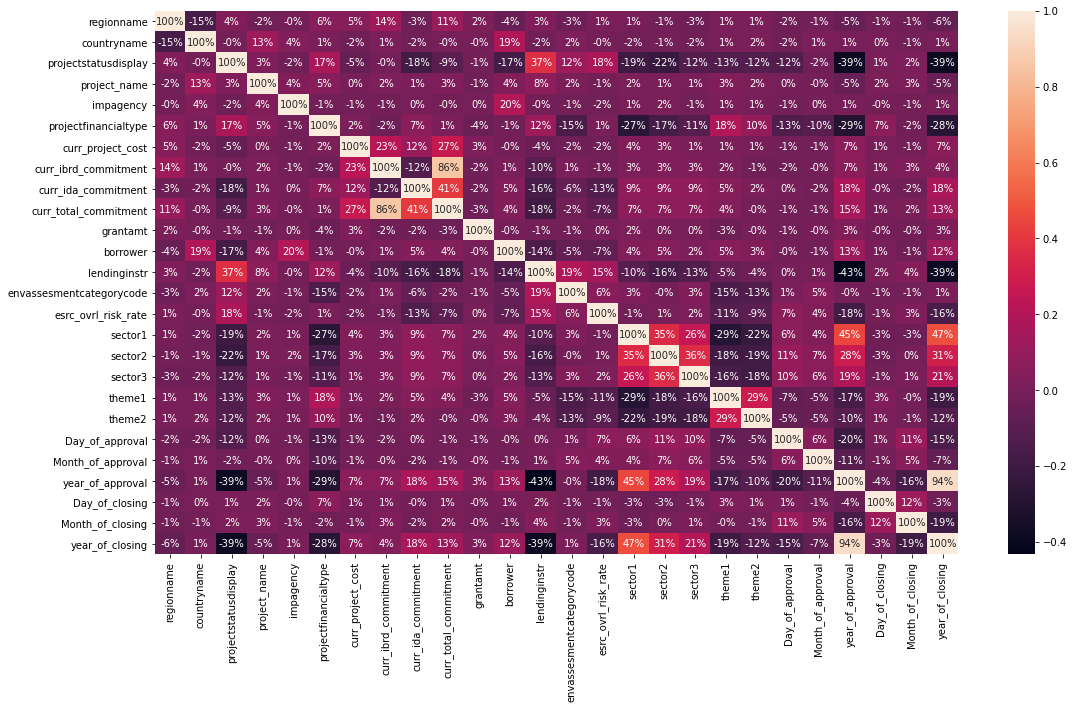

In [50]:
plt.figure(figsize=(18,10))
sns.heatmap(data.corr(),annot = True,fmt='.0%')
plt.show()

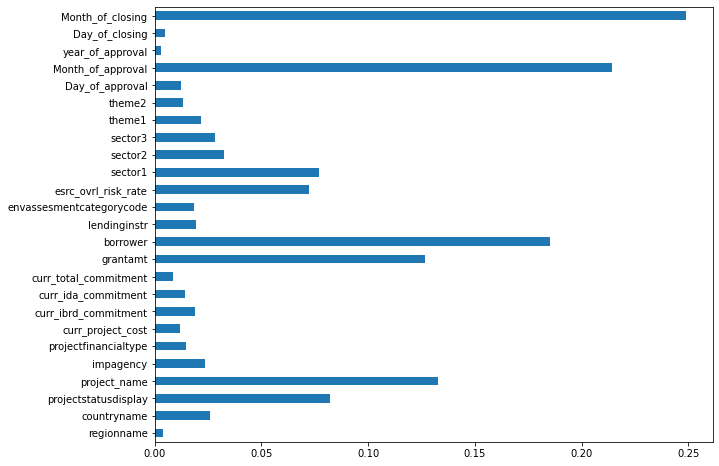

In [51]:
# Seperating data into independent and dependent variables.
X = data.drop('projectstatusdisplay',axis=1)
y = data['projectstatusdisplay']
from sklearn.feature_selection import mutual_info_classif

importances = mutual_info_classif(X,y)
feat_importance = pd.Series(importances,data.columns[0:len(data.columns)-1])
plt.figure(figsize=(10,8))
feat_importance.plot(kind='barh')
plt.show()

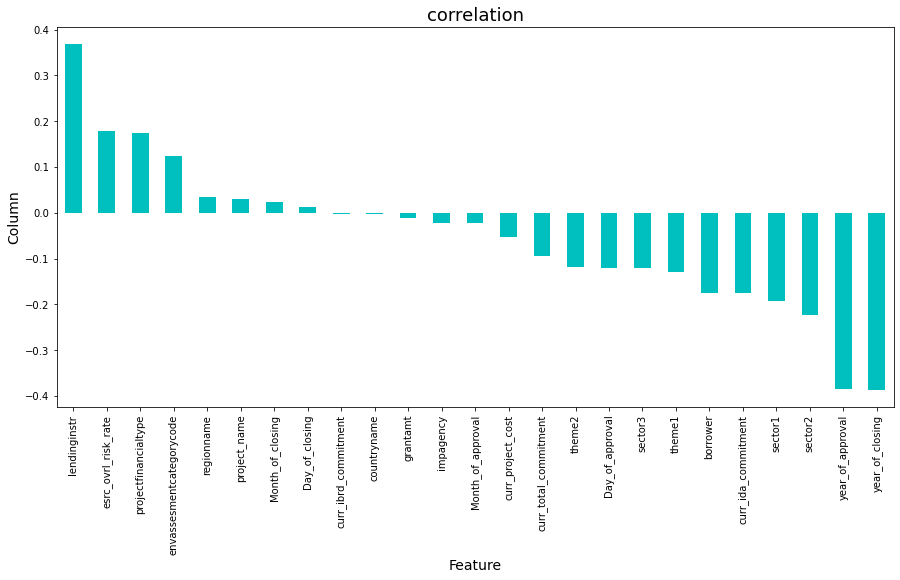

In [52]:
plt.figure(figsize=(15,7))
data.corr()['projectstatusdisplay'].sort_values(ascending=False).drop(['projectstatusdisplay']).plot(kind='bar',color='c')
plt.xlabel('Feature',fontsize=14)
plt.ylabel('Column',fontsize=14)
plt.title('correlation',fontsize=18)
plt.show()

In [53]:
data.columns

Index(['regionname', 'countryname', 'projectstatusdisplay', 'project_name',
       'impagency', 'projectfinancialtype', 'curr_project_cost',
       'curr_ibrd_commitment', 'curr_ida_commitment', 'curr_total_commitment',
       'grantamt', 'borrower', 'lendinginstr', 'envassesmentcategorycode',
       'esrc_ovrl_risk_rate', 'sector1', 'sector2', 'sector3', 'theme1',
       'theme2', 'Day_of_approval', 'Month_of_approval', 'year_of_approval',
       'Day_of_closing', 'Month_of_closing', 'year_of_closing'],
      dtype='object')

<AxesSubplot:xlabel='projectstatusdisplay', ylabel='count'>

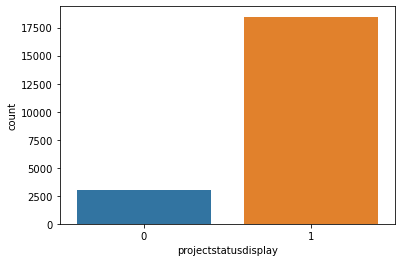

In [54]:
sns.countplot(data['projectstatusdisplay'])

In the above graph we found there is a data imbalancing problem we will treat this in below steps

In [55]:
from imblearn.over_sampling import SMOTE

In [56]:
smote = SMOTE()
x,y = smote.fit_resample(X,y)

<AxesSubplot:xlabel='projectstatusdisplay', ylabel='count'>

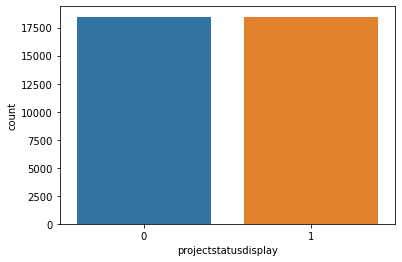

In [57]:
sns.countplot(y)

By the Smote method we coverted our imbalanced dataset in to a balanced dataset

In [58]:
# Finding Skewness of data 
data.skew()

regionname                    0.419798
countryname                  -0.104330
projectstatusdisplay         -2.092170
project_name                 -0.000328
impagency                    -0.027154
projectfinancialtype         -1.200320
curr_project_cost            44.018396
curr_ibrd_commitment          7.225909
curr_ida_commitment           5.633070
curr_total_commitment         5.867659
grantamt                    119.062253
borrower                      0.602243
lendinginstr                 -0.353105
envassesmentcategorycode      3.552428
esrc_ovrl_risk_rate          -7.250260
sector1                      -0.624662
sector2                       1.044282
sector3                       1.688421
theme1                       -0.984805
theme2                       -1.386896
Day_of_approval              -0.001956
Month_of_approval             0.575333
year_of_approval             -0.767331
Day_of_closing               -5.327124
Month_of_closing              0.211493
year_of_closing          

In [59]:
from sklearn.preprocessing import power_transform
x = power_transform(x,method='yeo-johnson')

In [60]:
#Scaling the Data by StandardScaler
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x = sc.fit_transform(x)

In [61]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score,f1_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

In [62]:
#Finding the best random state
from sklearn.linear_model import LogisticRegression
MaxAccu=0
maxRS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=i)
    mod=LogisticRegression()
    mod.fit(x_train,y_train)
    pred=mod.predict(x_test)
    acc=accuracy_score(y_test,pred)
    if acc>MaxAccu:
        MaxAccu=acc
        maxRS=i
print("Best accuracy is",MaxAccu,'on random state',maxRS)

Best accuracy is 0.9653554673403103 on random state 2


In [63]:
# Splitting the dataset into trianing and testing data
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=maxRS)

### Model Building

Accuracy score using logistic regression model is 96.53554673403103
F1 Score is  96.45887126521579
Cross validation score 92.54097091624513
-----------------------------
              precision    recall  f1-score   support

           0       0.95      0.98      0.97      5591
           1       0.98      0.95      0.96      5493

    accuracy                           0.97     11084
   macro avg       0.97      0.97      0.97     11084
weighted avg       0.97      0.97      0.97     11084

-----------------------------

 Confusion Matrix


<AxesSubplot:>

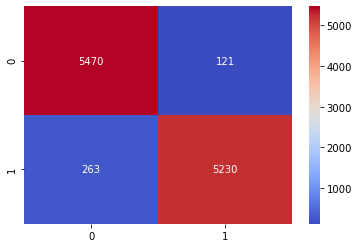

In [65]:
#Using logistic regression 
from sklearn.linear_model import LogisticRegression
classifier=LogisticRegression()
classifier.fit(x_train,y_train)
pred=classifier.predict(x_test)
lr_acc=accuracy_score(y_test,pred)
print('Accuracy score using logistic regression model is',lr_acc*100)
lr_f1=f1_score(y_test,pred)
print("F1 Score is ",lr_f1*100)
lr_cv=cross_val_score(classifier,x,y,cv=5).mean()
print("Cross validation score",lr_cv*100)
print('-----------------------------')
lr_acc1=classification_report(y_test,pred)
print(lr_acc1)
con_mat = confusion_matrix(y_test,pred)
print('-----------------------------')
print('\n Confusion Matrix')
plt.figure(figsize= (6,4))
sns.heatmap(con_mat, annot = True,fmt='d',cmap="coolwarm")

Accuracy of Decision Tree classification is  98.68278599783473
F1 Score is  98.67079388201019
Cross validation score 96.99850910296932
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      5591
           1       0.99      0.99      0.99      5493

    accuracy                           0.99     11084
   macro avg       0.99      0.99      0.99     11084
weighted avg       0.99      0.99      0.99     11084


 Confusion Matrix


<AxesSubplot:>

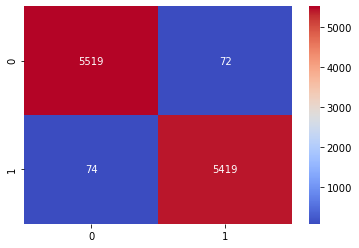

In [66]:
# Using Decision Tree Classification algorithm
from sklearn.tree import DecisionTreeClassifier
DTC=DecisionTreeClassifier()
DTC.fit(x_train,y_train)
pred=DTC.predict(x_test)
dtc_acc=accuracy_score(y_test,pred)
print("Accuracy of Decision Tree classification is ",dtc_acc*100)
dtc_f1=f1_score(y_test,pred)
print("F1 Score is ",dtc_f1*100)
CV3=cross_val_score(DTC,x,y,cv=5).mean()
print("Cross validation score",CV3*100)
#Printing confusion matrix
con_mat = confusion_matrix(y_test,pred)
dtc_acc1=classification_report(y_test,pred)
print(dtc_acc1)
print('\n Confusion Matrix')
plt.figure(figsize= (6,4))
sns.heatmap(con_mat, annot = True,fmt='d',cmap="coolwarm")

Accuracy score using GuassianNB classifier model is 92.5568386863948
F1 Score is  92.13311719271479
Cross validation score 91.35562774713023
-------------------------------
              precision    recall  f1-score   support

           0       0.89      0.97      0.93      5591
           1       0.97      0.88      0.92      5493

    accuracy                           0.93     11084
   macro avg       0.93      0.93      0.93     11084
weighted avg       0.93      0.93      0.93     11084

-------------------------------

 Confusion Matrix


<AxesSubplot:>

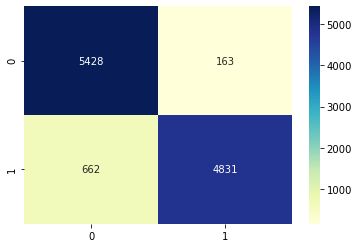

In [67]:
from sklearn.naive_bayes import GaussianNB
NB = GaussianNB()
NB.fit(x_train, y_train)
pred=NB.predict(x_test)
gnb_acc=accuracy_score(y_test,pred)
print('Accuracy score using GuassianNB classifier model is',gnb_acc*100)
gnb_cv=cross_val_score(NB,x,y,cv=5).mean()
gnb_f1=f1_score(y_test,pred)
print("F1 Score is ",gnb_f1*100)
print("Cross validation score",gnb_cv*100)
print('-------------------------------')
acc=classification_report(y_test,pred)
print(acc)
con_mat = confusion_matrix(y_test,pred)
print('-------------------------------')
print('\n Confusion Matrix')
plt.figure(figsize= (6,4))
sns.heatmap(con_mat, annot = True,fmt='d',cmap="YlGnBu")

Accuracy of Random Forest Classificarion is  99.10682064236738
Cross validation score 96.10822436379571
F1 Score is  99.0961380443714
-------------------------------
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      5591
           1       0.99      0.99      0.99      5493

    accuracy                           0.99     11084
   macro avg       0.99      0.99      0.99     11084
weighted avg       0.99      0.99      0.99     11084

-------------------------------

 Confusion Matrix


<AxesSubplot:>

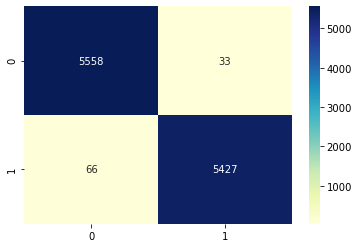

In [69]:
#Using random forest classification
from sklearn.ensemble import RandomForestClassifier
RF=RandomForestClassifier() # creating instance of class
RF.fit(x_train,y_train) #Fitting the data
pred=RF.predict(x_test) # Predicting the data 
rfc_acc=accuracy_score(y_test,pred)
print("Accuracy of Random Forest Classificarion is ",rfc_acc*100)
rfc_cv=cross_val_score(RF,x,y,cv=5).mean()
print("Cross validation score",rfc_cv*100)
rfc_f1=f1_score(y_test,pred)
print("F1 Score is ",rfc_f1*100)
print('-------------------------------')
acc=classification_report(y_test,pred)
print(acc)
con_mat = confusion_matrix(y_test,pred)
print('-------------------------------')
print('\n Confusion Matrix')
plt.figure(figsize= (6,4))
sns.heatmap(con_mat, annot = True,fmt='d',cmap="YlGnBu")

Accuracy of Support Vector Classification is  97.80765066762902
F1 Score is  97.75436650956475
Cross validation score 94.84969776416725
              precision    recall  f1-score   support

           0       0.96      0.99      0.98      5591
           1       0.99      0.96      0.98      5493

    accuracy                           0.98     11084
   macro avg       0.98      0.98      0.98     11084
weighted avg       0.98      0.98      0.98     11084


 Confusion Matrix


<AxesSubplot:>

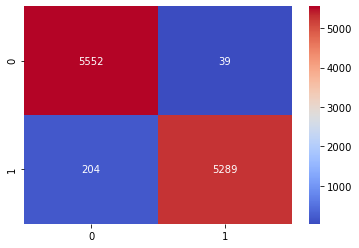

In [71]:
#Using Support vector classification
from sklearn.svm import SVC
svc=SVC()
svc.fit(x_train,y_train)
pred=svc.predict(x_test)
svc_acc=accuracy_score(y_test,pred)
print("Accuracy of Support Vector Classification is ",svc_acc*100)
CV2=cross_val_score(svc,x,y,cv=5).mean()
svc_f1=f1_score(y_test,pred)
print("F1 Score is ",svc_f1*100)
print("Cross validation score",CV2*100)
svc_acc1=classification_report(y_test,pred)
print(svc_acc1)
con_mat = confusion_matrix(y_test,pred)
print('\n Confusion Matrix')
plt.figure(figsize= (6,4))
sns.heatmap(con_mat, annot = True,fmt='d',cmap="coolwarm")

Accuracy score using gradient boosting classifier model is 98.93540238181163
F1 Score is  98.92257121986852
Cross validation score 95.43430887189037
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      5591
           1       0.99      0.99      0.99      5493

    accuracy                           0.99     11084
   macro avg       0.99      0.99      0.99     11084
weighted avg       0.99      0.99      0.99     11084


 Confusion Matrix


<AxesSubplot:>

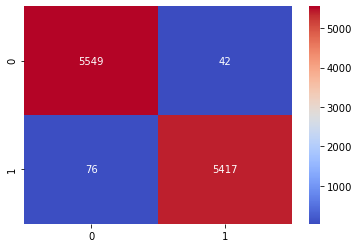

In [72]:
### using gradient boosting classifier
from sklearn.ensemble import GradientBoostingClassifier
clf=GradientBoostingClassifier()
clf.fit(x_train, y_train)
pred=clf.predict(x_test)
gbc_acc=accuracy_score(y_test,pred)
print('Accuracy score using gradient boosting classifier model is',gbc_acc*100)
gbc_f1=f1_score(y_test,pred)
print("F1 Score is ",gbc_f1*100)
CV5=cross_val_score(clf,x,y,cv=5).mean()
print("Cross validation score",CV5*100)
gbc_acc1=classification_report(y_test,pred)
print(gbc_acc1)
con_mat = confusion_matrix(y_test,pred)
print('\n Confusion Matrix')
plt.figure(figsize= (6,4))
sns.heatmap(con_mat, annot = True,fmt='d',cmap="coolwarm")


In [73]:
model=['Logistic Regression','Decision Tree Classifier',' GuassianNB classifier','Random Forest Classifier',
       'Support Vector Classifier','Gradient boosting classifier']
acc=[lr_acc*100,dtc_acc*100,gnb_acc*100,rfc_acc*100,svc_acc*100,gbc_acc*100]
f1=[lr_f1*100,dtc_f1*100,gnb_f1*100,rfc_f1*100,svc_f1*100,gbc_f1*100]

cv_score=[lr_cv*100,CV3*100,gnb_cv*100,rfc_cv*100,CV2*100,CV5*100]
result=pd.DataFrame({'Model':model,'Accuracy_score':acc,'F1_Score':f1,'CV_score':cv_score})
result
# Creting dataframe to store accuracyand cv score of all the models.

,Model,Accuracy_score,F1_Score,CV_score
0,Logistic Regression,96.535547,96.458871,92.540971
1,Decision Tree Classifier,98.682786,98.670794,96.998509
2,GuassianNB classifier,92.556839,92.133117,91.355628
3,Random Forest Classifier,99.106821,99.096138,96.108224
4,Support Vector Classifier,97.807651,97.754367,94.849698
5,Gradient boosting classifier,98.935402,98.922571,95.434309


### Choosing the model
- We will be considering the F1 score as evaluation metrics as there is class imbalanced problem for choosing the best model.
- Random Forest Classifier is giving highest f1 score of 99.10, so we choosing it as best model.


### Applying hyperparamter tuning to best accuracy model

In [80]:
parameters = { 
            "n_estimators"      : [10,50,100],
            "max_features"      : ["auto", "sqrt", "log2"],
            "min_samples_split" : [2,4,8],
            "bootstrap": [True, False],
            }

In [81]:
GCV=GridSearchCV(RandomForestClassifier(),parameters,cv=5)

In [82]:
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'bootstrap': [True, False],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_split': [2, 4, 8],
                         'n_estimators': [10, 50, 100]})

In [83]:
GCV.best_params_

{'bootstrap': False,
 'max_features': 'sqrt',
 'min_samples_split': 4,
 'n_estimators': 50}

Accuracy of Random Forest Classificarion is  99.1248646697943
Cross validation score 95.46681559154878
F1 Score is  99.11439788185885
-------------------------------
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      5591
           1       0.99      0.99      0.99      5493

    accuracy                           0.99     11084
   macro avg       0.99      0.99      0.99     11084
weighted avg       0.99      0.99      0.99     11084

-------------------------------

 Confusion Matrix


<AxesSubplot:>

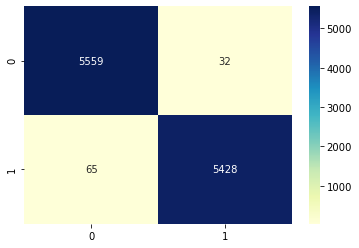

In [84]:
Final_Model=RandomForestClassifier(bootstrap=False,max_features='sqrt',min_samples_split=4,n_estimators=50) 
Final_Model.fit(x_train,y_train) #Fitting the data
pred=Final_Model.predict(x_test) # Predicting the data 
rfc_acc=accuracy_score(y_test,pred)
print("Accuracy of Random Forest Classificarion is ",rfc_acc*100)
rfc_cv=cross_val_score(RF,x,y,cv=5).mean()
print("Cross validation score",rfc_cv*100)
rfc_f1=f1_score(y_test,pred)
print("F1 Score is ",rfc_f1*100)
print('-------------------------------')
acc=classification_report(y_test,pred)
print(acc)
con_mat = confusion_matrix(y_test,pred)
print('-------------------------------')
print('\n Confusion Matrix')
plt.figure(figsize= (6,4))
sns.heatmap(con_mat, annot = True,fmt='d',cmap="YlGnBu")

In [85]:
#Saving Final Model
import joblib
import sys
sys.modules['sklearn.externals.joblib']=joblib
from sklearn.externals import joblib


In [86]:
joblib.dump(Final_Model,'Final_Model.pkl')

['Final_Model.pkl']